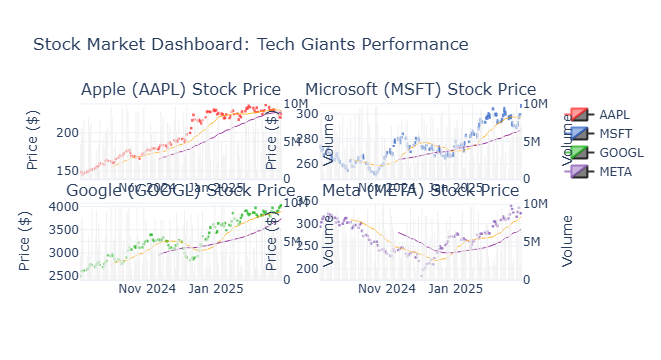

In [1]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Generate sample stock data
def generate_stock_data(ticker, start_price, volatility, days=180):
    np.random.seed(hash(ticker) % 100)  # Different seed for each ticker
    
    end_date = datetime.now().date()
    start_date = end_date - timedelta(days=days)
    date_range = pd.date_range(start=start_date, end=end_date, freq='B')  # Business days
    
    # Generate price movements
    daily_returns = np.random.normal(0.0005, volatility, len(date_range))
    
    # Add some trend
    if ticker in ['AAPL', 'MSFT']:
        daily_returns += 0.001
    elif ticker == 'META':
        # Add a sudden drop and recovery
        drop_idx = len(daily_returns) // 2
        daily_returns[drop_idx] = -0.15
        daily_returns[drop_idx+1:drop_idx+10] += 0.01
    
    # Calculate price series
    price_series = start_price * (1 + daily_returns).cumprod()
    
    # Create volume data
    volume = np.random.randint(1000000, 10000000, len(date_range))
    
    # Create DataFrame
    df = pd.DataFrame({
        'Date': date_range,
        'Open': price_series * (1 - 0.005 * np.random.random(len(date_range))),
        'High': price_series * (1 + 0.01 * np.random.random(len(date_range))),
        'Low': price_series * (1 - 0.01 * np.random.random(len(date_range))),
        'Close': price_series,
        'Volume': volume
    })
    
    return df

# Generate data for multiple stocks
tickers = ['AAPL', 'MSFT', 'GOOGL', 'META']
start_prices = [150, 280, 2500, 300]
volatilities = [0.015, 0.012, 0.02, 0.025]

stock_data = {ticker: generate_stock_data(ticker, price, vol) 
              for ticker, price, vol in zip(tickers, start_prices, volatilities)}

# Create dashboard layout
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=(
        "Apple (AAPL) Stock Price", 
        "Microsoft (MSFT) Stock Price",
        "Google (GOOGL) Stock Price", 
        "Meta (META) Stock Price"
    ),
    specs=[
        [{"secondary_y": True}, {"secondary_y": True}],
        [{"secondary_y": True}, {"secondary_y": True}]
    ],
    vertical_spacing=0.12,
    horizontal_spacing=0.08
)

# Colors for each stock
colors = {'AAPL': 'rgba(255, 59, 59, 0.8)', 
          'MSFT': 'rgba(67, 114, 204, 0.8)',
          'GOOGL': 'rgba(46, 184, 46, 0.8)', 
          'META': 'rgba(147, 103, 188, 0.8)'}

# Add data for each stock
positions = {'AAPL': (1, 1), 'MSFT': (1, 2), 'GOOGL': (2, 1), 'META': (2, 2)}

for ticker, position in positions.items():
    df = stock_data[ticker]
    row, col = position
    
    # Add candlestick chart
    fig.add_trace(
        go.Candlestick(
            x=df['Date'],
            open=df['Open'],
            high=df['High'],
            low=df['Low'],
            close=df['Close'],
            name=ticker,
            increasing_line_color=colors[ticker],
            decreasing_line_color='rgba(0, 0, 0, 0.8)'
        ),
        row=row, col=col
    )
    
    # Add volume as bar chart on secondary axis
    fig.add_trace(
        go.Bar(
            x=df['Date'],
            y=df['Volume'],
            name=f"{ticker} Volume",
            marker_color='rgba(180, 180, 180, 0.4)',
            showlegend=False
        ),
        row=row, col=col, secondary_y=True
    )
    
    # Add moving averages
    fig.add_trace(
        go.Scatter(
            x=df['Date'],
            y=df['Close'].rolling(window=20).mean(),
            line=dict(color='rgba(255, 165, 0, 0.8)', width=1),
            name=f"{ticker} 20-day MA",
            showlegend=False
        ),
        row=row, col=col
    )
    
    fig.add_trace(
        go.Scatter(
            x=df['Date'],
            y=df['Close'].rolling(window=50).mean(),
            line=dict(color='rgba(128, 0, 128, 0.8)', width=1),
            name=f"{ticker} 50-day MA",
            showlegend=False
        ),
        row=row, col=col
    )

# Update layout
fig.update_layout(
    title='Stock Market Dashboard: Tech Giants Performance',
    height=800,
    template='plotly_white',
    xaxis_rangeslider_visible=False,
    xaxis2_rangeslider_visible=False,
    xaxis3_rangeslider_visible=False,
    xaxis4_rangeslider_visible=False
)

# Update y-axis labels
for i in range(1, 5):
    fig.update_yaxes(title_text="Price ($)", row=(i+1)//2, col=((i+1)%2)+1)
    fig.update_yaxes(title_text="Volume", row=(i+1)//2, col=((i+1)%2)+1, secondary_y=True)

fig.show()

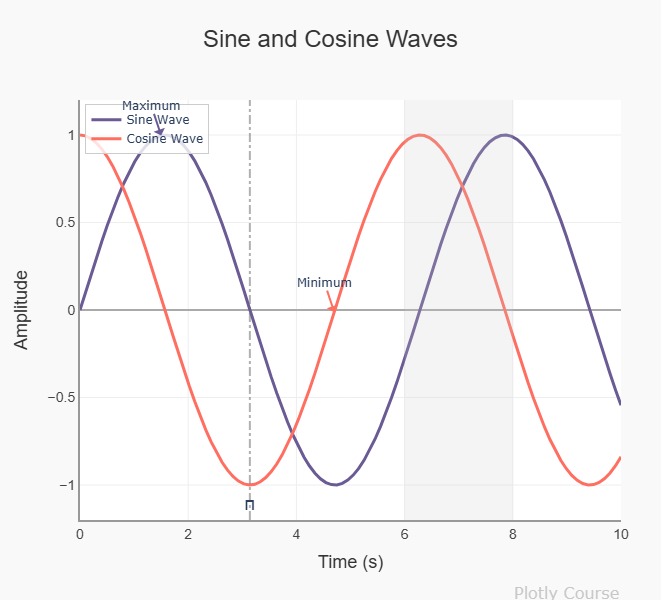

In [3]:
import plotly.graph_objects as go
import numpy as np

# Create sample data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# Create figure
fig = go.Figure()

# Add traces
fig.add_trace(
    go.Scatter(
        x=x,
        y=y1,
        name="Sine Wave",
        line=dict(color="#6B5B95", width=3)
    )
)

fig.add_trace(
    go.Scatter(
        x=x,
        y=y2,
        name="Cosine Wave",
        line=dict(color="#FF6F61", width=3)
    )
)

# Add annotations
fig.add_annotation(
    x=1.5,
    y=np.sin(1.5),
    text="Maximum",
    showarrow=True,
    arrowhead=1,
    arrowsize=1,
    arrowwidth=2,
    arrowcolor="#6B5B95"
)

fig.add_annotation(
    x=4.7,
    y=np.cos(4.7),
    text="Minimum",
    showarrow=True,
    arrowhead=1,
    arrowsize=1,
    arrowwidth=2,
    arrowcolor="#FF6F61"
)

# Add customized axes
fig.update_xaxes(
    title_text="Time (s)",
    title_font=dict(size=18, family="Arial", color="#333333"),
    tickfont=dict(size=14, family="Arial", color="#444444"),
    showgrid=True,
    gridwidth=1,
    gridcolor="#EEEEEE",
    showline=True,
    linewidth=2,
    linecolor="#999999",
    zeroline=True,
    zerolinewidth=2,
    zerolinecolor="#AAAAAA",
    range=[0, 10]
)

fig.update_yaxes(
    title_text="Amplitude",
    title_font=dict(size=18, family="Arial", color="#333333"),
    tickfont=dict(size=14, family="Arial", color="#444444"),
    showgrid=True,
    gridwidth=1,
    gridcolor="#EEEEEE",
    showline=True,
    linewidth=2,
    linecolor="#999999",
    zeroline=True,
    zerolinewidth=2,
    zerolinecolor="#AAAAAA",
    range=[-1.2, 1.2]
)

# Add shapes to highlight regions
fig.add_shape(
    type="rect",
    x0=6,
    x1=8,
    y0=-1.2,
    y1=1.2,
    line=dict(width=0),
    fillcolor="rgba(200, 200, 200, 0.2)"
)

# Add a vertical line
fig.add_shape(
    type="line",
    x0=3.14,
    x1=3.14,
    y0=-1.2,
    y1=1.2,
    line=dict(
        color="rgba(100, 100, 100, 0.5)",
        width=2,
        dash="dashdot"
    )
)

# Add a horizontal line
fig.add_shape(
    type="line",
    x0=0,
    x1=10,
    y0=0,
    y1=0,
    line=dict(
        color="rgba(100, 100, 100, 0.5)",
        width=2,
        dash="dashdot"
    ),
    layer="below"
)

# Add text labels
fig.add_annotation(
    x=3.14,
    y=-1.1,
    text="π",
    showarrow=False,
    font=dict(size=18)
)

# Update layout with advanced styling
fig.update_layout(
    title=dict(
        text="Sine and Cosine Waves",
        font=dict(size=24, family="Arial", color="#333333"),
        x=0.5,
        y=0.95
    ),
    paper_bgcolor="#F9F9F9",
    plot_bgcolor="#FFFFFF",
    legend=dict(
        x=0.01,
        y=0.99,
        bgcolor="rgba(255, 255, 255, 0.8)",
        bordercolor="#CCCCCC",
        borderwidth=1
    ),
    margin=dict(l=80, r=40, t=100, b=80),
    height=600,
    width=900,
    hovermode="x unified",
    hoverlabel=dict(
        bgcolor="white",
        font_size=14,
        font_family="Arial"
    )
)

# Add watermark/logo
fig.add_annotation(
    x=1,
    y=-0.2,
    xref="paper",
    yref="paper",
    text="Plotly Course",
    showarrow=False,
    font=dict(size=16, color="rgba(150, 150, 150, 0.5)")
)

# Add custom hover template
fig.update_traces(
    hovertemplate="<b>Time</b>: %{x:.2f}s<br>" +
                  "<b>Value</b>: %{y:.4f}<br>" +
                  "<extra></extra>"
)

fig.show()

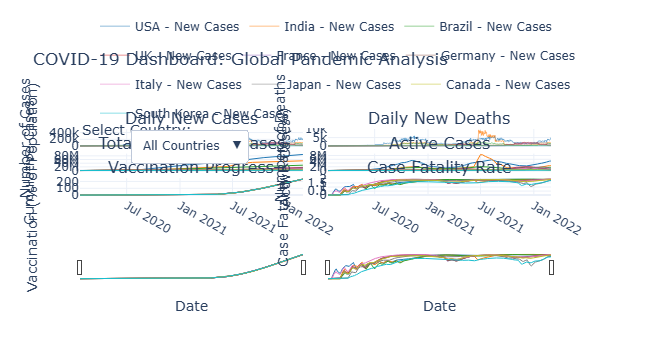

In [5]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Generate sample COVID-19 data
np.random.seed(42)

# Create date range
start_date = datetime(2020, 1, 22)
end_date = datetime(2022, 3, 1)
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

# Create countries
countries = ['USA', 'India', 'Brazil', 'UK', 'France', 'Germany', 'Italy', 'Japan', 'Canada', 'South Korea']

# Base patterns for different regions
patterns = {
    'USA': [100, 500, 1000, 5000, 20000, 40000, 80000, 150000, 200000, 250000, 180000, 
            100000, 70000, 50000, 70000, 120000, 180000, 220000, 250000, 200000, 150000,
            100000, 80000, 100000, 150000, 200000],
    'India': [10, 100, 500, 1000, 5000, 10000, 20000, 40000, 80000, 95000, 90000, 
              60000, 40000, 30000, 40000, 60000, 90000, 400000, 300000, 150000, 50000,
              30000, 20000, 30000, 60000, 100000],
    'Brazil': [5, 50, 200, 500, 2000, 8000, 15000, 30000, 70000, 80000, 75000, 
               50000, 35000, 25000, 35000, 50000, 75000, 90000, 80000, 60000, 40000,
               25000, 15000, 20000, 40000, 70000],
    'UK': [20, 100, 500, 1500, 5000, 8000, 6000, 3000, 2000, 1000, 500,
           1000, 3000, 8000, 30000, 50000, 40000, 20000, 15000, 10000,
           20000, 40000, 80000, 100000, 90000, 50000, 20000],
    'France': [15, 80, 400, 1200, 4000, 7000, 5000, 2500, 1500, 800, 400,
              800, 2500, 7000, 25000, 45000, 35000, 18000, 12000, 8000,
              15000, 35000, 70000, 90000, 80000, 45000, 18000],
    'Germany': [10, 70, 350, 1000, 3500, 6000, 4500, 2200, 1300, 700, 350,
               700, 2200, 6000, 20000, 40000, 30000, 15000, 10000, 7000,
               12000, 30000, 65000, 85000, 75000, 40000, 15000],
    'Italy': [50, 200, 1000, 4000, 6000, 5000, 3000, 1500, 800, 400, 200,
             400, 1500, 5000, 15000, 25000, 20000, 10000, 7000, 4000,
             8000, 20000, 40000, 60000, 55000, 30000, 12000],
    'Japan': [5, 20, 100, 300, 500, 800, 1000, 1500, 1000, 500, 300,
              200, 300, 500, 1000, 1500, 1200, 800, 500, 300,
              500, 1000, 4000, 8000, 20000, 80000, 100000, 50000],
    'Canada': [10, 50, 200, 600, 1200, 2000, 1500, 800, 500, 300, 200,
              400, 800, 2000, 5000, 8000, 6000, 3000, 2000, 1000,
              2000, 5000, 10000, 20000, 30000, 20000, 8000],
    'South Korea': [10, 30, 50, 80, 100, 150, 200, 400, 300, 150, 50,
                    20, 10, 20, 50, 150, 300, 600, 400, 200, 100,
                    300, 1000, 5000, 10000, 15000, 8000]
}

# Create DataFrame
covid_data = []

for country in countries:
    # Get base pattern for this country
    base_pattern = patterns[country]
    
    # Stretch pattern to match the date range
    stretched_pattern = []
    period_length = len(date_range) / len(base_pattern)
    
    for i in range(len(date_range)):
        pattern_idx = min(int(i / period_length), len(base_pattern) - 1)
        stretched_pattern.append(base_pattern[pattern_idx])
    
    # Apply some random variation
    cases = []
    for base in stretched_pattern:
        random_factor = np.random.normal(1, 0.1)  # 10% random variation
        cases.append(int(base * random_factor))
    
    # Create deaths (roughly 2% of cases, with a 14-day lag)
    deaths = [0] * 14 + [int(case * 0.02) for case in cases[:-14]]
    deaths = deaths[:len(cases)]
    
    # Create recoveries (roughly 97% of cases, with a 21-day lag)
    recoveries = [0] * 21 + [int(case * 0.97) for case in cases[:-21]]
    recoveries = recoveries[:len(cases)]
    
    # Create tests (roughly 10x cases)
    tests = [case * (8 + np.random.randint(0, 5)) for case in cases]
    
    # Create vaccinations (starting from day 300, gradually increasing)
    vaccinations = [0] * 300
    vax_population = {
        'USA': 330, 'India': 1380, 'Brazil': 212, 'UK': 67, 'France': 65,
        'Germany': 83, 'Italy': 60, 'Japan': 126, 'Canada': 38, 'South Korea': 52
    }
    country_pop = vax_population[country]
    
    # Create sigmoid-like vaccination curve
    remaining_days = len(date_range) - 300
    for i in range(remaining_days):
        progress = i / remaining_days
        sigmoid = 1 / (1 + np.exp(-10 * (progress - 0.5)))  # Sigmoid function centered at 0.5
        daily_vax = int(sigmoid * country_pop * 10000 * np.random.uniform(0.8, 1.2))
        vaccinations.append(daily_vax)
    
    vaccinations = vaccinations[:len(date_range)]
    
    # Add to data
    for i, date in enumerate(date_range):
        covid_data.append({
            'Date': date,
            'Country': country,
            'New_Cases': cases[i],
            'New_Deaths': deaths[i],
            'New_Recoveries': recoveries[i],
            'Tests': tests[i],
            'Vaccinations': vaccinations[i]
        })

# Create DataFrame
covid_df = pd.DataFrame(covid_data)

# Calculate cumulative metrics
covid_df['Cumulative_Cases'] = covid_df.groupby('Country')['New_Cases'].cumsum()
covid_df['Cumulative_Deaths'] = covid_df.groupby('Country')['New_Deaths'].cumsum()
covid_df['Cumulative_Recoveries'] = covid_df.groupby('Country')['New_Recoveries'].cumsum()
covid_df['Cumulative_Vaccinations'] = covid_df.groupby('Country')['Vaccinations'].cumsum()

# Calculate active cases
covid_df['Active_Cases'] = covid_df['Cumulative_Cases'] - covid_df['Cumulative_Recoveries'] - covid_df['Cumulative_Deaths']

# Calculate 7-day rolling averages
covid_df['Cases_7day_Avg'] = covid_df.groupby('Country')['New_Cases'].rolling(7).mean().reset_index(0, drop=True)
covid_df['Deaths_7day_Avg'] = covid_df.groupby('Country')['New_Deaths'].rolling(7).mean().reset_index(0, drop=True)

# Create dashboard
fig = make_subplots(
    rows=3, cols=2,
    subplot_titles=(
        "Daily New Cases", 
        "Daily New Deaths",
        "Total Cumulative Cases", 
        "Active Cases",
        "Vaccination Progress", 
        "Case Fatality Rate"
    ),
    specs=[
        [{"secondary_y": True}, {"secondary_y": True}],
        [{"secondary_y": False}, {"secondary_y": False}],
        [{"secondary_y": False}, {"secondary_y": False}]
    ],
    vertical_spacing=0.10,
    horizontal_spacing=0.05,
    shared_xaxes=True
)

# Color map for countries
colors = {
    'USA': '#1f77b4', 'India': '#ff7f0e', 'Brazil': '#2ca02c', 'UK': '#d62728', 'France': '#9467bd',
    'Germany': '#8c564b', 'Italy': '#e377c2', 'Japan': '#7f7f7f', 'Canada': '#bcbd22', 'South Korea': '#17becf'
}

# Initialize buttons list for country selection
buttons = []

# Add 'All Countries' button
visible_all = [True] * (len(countries) * 6)  # 6 traces per country
buttons.append(
    dict(
        label="All Countries",
        method="update",
        args=[{"visible": visible_all}]
    )
)

# Add country-specific buttons and traces
for i, country in enumerate(countries):
    country_data = covid_df[covid_df['Country'] == country]
    
    # Create visibility list for this country
    visible = [False] * (len(countries) * 6)
    for j in range(6):  # 6 traces per country
        visible[i * 6 + j] = True
    
    # Add button for this country
    buttons.append(
        dict(
            label=country,
            method="update",
            args=[{"visible": visible}]
        )
    )
    
    # Daily New Cases (row 1, col 1)
    fig.add_trace(
        go.Scatter(
            x=country_data['Date'],
            y=country_data['New_Cases'],
            name=f"{country} - New Cases",
            line=dict(color=colors[country], width=0.5),
            legendgroup=country,
            showlegend=True
        ),
        row=1, col=1
    )
    
    # Daily New Deaths (row 1, col 2)
    fig.add_trace(
        go.Scatter(
            x=country_data['Date'],
            y=country_data['New_Deaths'],
            name=f"{country} - New Deaths",
            line=dict(color=colors[country], width=0.5),
            legendgroup=country,
            showlegend=False
        ),
        row=1, col=2
    )
    
    # Total Cumulative Cases (row 2, col 1)
    fig.add_trace(
        go.Scatter(
            x=country_data['Date'],
            y=country_data['Cumulative_Cases'],
            name=f"{country} - Total Cases",
            line=dict(color=colors[country], width=1),
            legendgroup=country,
            showlegend=False
        ),
        row=2, col=1
    )
    
    # Active Cases (row 2, col 2)
    fig.add_trace(
        go.Scatter(
            x=country_data['Date'],
            y=country_data['Active_Cases'],
            name=f"{country} - Active Cases",
            line=dict(color=colors[country], width=1),
            legendgroup=country,
            showlegend=False
        ),
        row=2, col=2
    )
    
    # Vaccination Progress (row 3, col 1)
    # Calculate as % of population
    country_population = vax_population[country] * 1000000  # Convert to actual population
    vaccination_pct = country_data['Cumulative_Vaccinations'] / country_population * 100
    
    fig.add_trace(
        go.Scatter(
            x=country_data['Date'],
            y=vaccination_pct,
            name=f"{country} - Vaccination %",
            line=dict(color=colors[country], width=1),
            legendgroup=country,
            showlegend=False
        ),
        row=3, col=1
    )
    
    # Case Fatality Rate (row 3, col 2)
    # Calculate as deaths / cases * 100
    cfr = country_data['Cumulative_Deaths'] / country_data['Cumulative_Cases'].replace(0, np.nan) * 100
    
    fig.add_trace(
        go.Scatter(
            x=country_data['Date'],
            y=cfr,
            name=f"{country} - CFR",
            line=dict(color=colors[country], width=1),
            legendgroup=country,
            showlegend=False
        ),
        row=3, col=2
    )

# Update layout
fig.update_layout(
    title="COVID-19 Dashboard: Global Pandemic Analysis",
    height=900,
    template="plotly_white",
    hovermode="closest",
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    # Add dropdown menu
    updatemenus=[
        dict(
            buttons=buttons,
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.15,
            yanchor="top"
        )
    ]
)

# Add annotation for dropdown
fig.add_annotation(
    text="Select Country:",
    x=0,
    y=1.15,
    xref="paper",
    yref="paper",
    showarrow=False,
    font=dict(size=14)
)

# Update y-axis titles
fig.update_yaxes(title_text="Number of Cases", row=1, col=1)
fig.update_yaxes(title_text="Number of Deaths", row=1, col=2)
fig.update_yaxes(title_text="Cumulative Cases", row=2, col=1)
fig.update_yaxes(title_text="Active Cases", row=2, col=2)
fig.update_yaxes(title_text="Vaccination (% of Population)", row=3, col=1)
fig.update_yaxes(title_text="Case Fatality Rate (%)", row=3, col=2)

# Update x-axis titles
fig.update_xaxes(title_text="Date", row=3, col=1)
fig.update_xaxes(title_text="Date", row=3, col=2)

# Add range slider to bottom charts
fig.update_xaxes(
    rangeslider_visible=True,
    row=3, col=1
)
fig.update_xaxes(
    rangeslider_visible=True,
    row=3, col=2
)

fig.show()

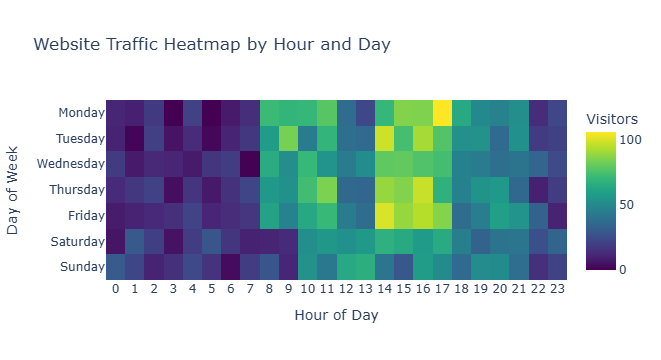

In [7]:
import plotly.express as px
import numpy as np

# Generate sample data for website traffic by hour and day
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hours = list(range(24))

# Create a pattern: higher traffic during work hours on weekdays,
# different pattern on weekends
base_traffic = np.zeros((7, 24))

# Weekday pattern (Mon-Fri)
for i in range(5):
    # Morning increase
    base_traffic[i, 8:12] = np.random.uniform(50, 80, size=4)
    # Lunch dip
    base_traffic[i, 12:14] = np.random.uniform(30, 50, size=2)
    # Afternoon peak
    base_traffic[i, 14:18] = np.random.uniform(70, 100, size=4)
    # Evening decline
    base_traffic[i, 18:22] = np.random.uniform(40, 60, size=4)
    # Night (low)
    base_traffic[i, 22:] = np.random.uniform(10, 30, size=2)
    base_traffic[i, :8] = np.random.uniform(5, 20, size=8)

# Weekend pattern (Sat-Sun)
for i in range(5, 7):
    # More evenly distributed, with afternoon peak
    base_traffic[i, :10] = np.random.uniform(10, 30, size=10)
    base_traffic[i, 10:18] = np.random.uniform(40, 70, size=8)
    base_traffic[i, 18:22] = np.random.uniform(30, 50, size=4)
    base_traffic[i, 22:] = np.random.uniform(10, 30, size=2)

# Add some noise
traffic_data = base_traffic + np.random.normal(0, 5, size=base_traffic.shape)
traffic_data = np.maximum(traffic_data, 0)  # Ensure no negative values

# Create heatmap
fig = px.imshow(traffic_data,
                labels=dict(x="Hour of Day", y="Day of Week", color="Visitors"),
                x=hours,
                y=days,
                color_continuous_scale='Viridis',
                title='Website Traffic Heatmap by Hour and Day')

fig.update_layout(
    xaxis=dict(tickmode='linear'),
    coloraxis_colorbar=dict(title='Visitors')
)

fig.show()

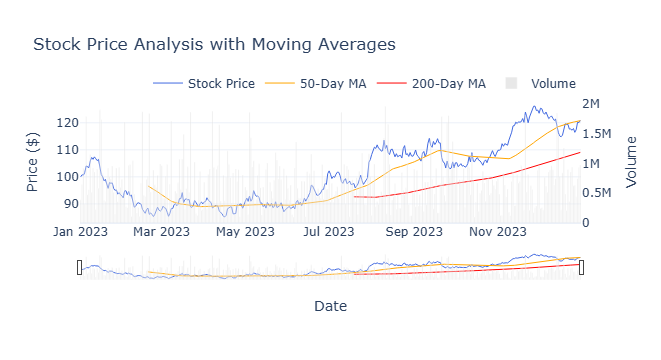

In [9]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Generate sample stock data
np.random.seed(42)
days = 365
dates = [datetime(2023, 1, 1) + timedelta(days=i) for i in range(days)]

# Create a realistic stock price pattern
price = 100  # Starting price
prices = [price]
daily_returns = np.random.normal(0.0005, 0.015, days-1)  # Mean slightly positive

for ret in daily_returns:
    price *= (1 + ret)
    prices.append(price)

# Create volume data (higher on significant price changes)
volumes = []
for i in range(days):
    if i == 0:
        volumes.append(np.random.randint(100000, 1000000))
    else:
        price_change = abs(prices[i] - prices[i-1]) / prices[i-1]
        if price_change > 0.02:  # Significant price change
            volumes.append(np.random.randint(500000, 2000000))
        else:
            volumes.append(np.random.randint(100000, 1000000))

# Create DataFrame
df = pd.DataFrame({
    'Date': dates,
    'Close': prices,
    'Volume': volumes
})

# Calculate moving averages
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

# Create figure
fig = go.Figure()

# Add candlestick chart
fig.add_trace(
    go.Scatter(
        x=df['Date'],
        y=df['Close'],
        mode='lines',
        name='Stock Price',
        line=dict(color='royalblue', width=1)
    )
)

# Add moving averages
fig.add_trace(
    go.Scatter(
        x=df['Date'],
        y=df['MA50'],
        mode='lines',
        name='50-Day MA',
        line=dict(color='orange', width=1)
    )
)

fig.add_trace(
    go.Scatter(
        x=df['Date'],
        y=df['MA200'],
        mode='lines',
        name='200-Day MA',
        line=dict(color='red', width=1)
    )
)

# Add volume as a bar chart on a secondary y-axis
fig.add_trace(
    go.Bar(
        x=df['Date'],
        y=df['Volume'],
        name='Volume',
        marker=dict(color='lightgray'),
        opacity=0.5,
        yaxis='y2'
    )
)

# Update layout
fig.update_layout(
    title='Stock Price Analysis with Moving Averages',
    xaxis_title='Date',
    yaxis_title='Price ($)',
    template='plotly_white',
    xaxis_rangeslider_visible=True,
    yaxis2=dict(
        title='Volume',
        overlaying='y',
        side='right',
        showgrid=False
    ),
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)

fig.show()